In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
from tqdm import tqdm
from glob import glob
import gc
import cv2
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import math
import zipfile

# 데이터 불러오기

In [2]:
train_csv = pd.read_csv('./data/train.csv')
test_csv = pd.read_csv('./data/test.csv')

In [ ]:
train_csv.head()

In [ ]:
test_csv.head()

In [3]:
train_all_input_files = './data/train_input_img/'+train_csv['input_img']
train_all_label_files = './data/train_label_img/'+train_csv['label_img']

In [4]:
len(train_all_input_files), len(train_all_label_files)

(622, 622)

In [5]:
train_all_input_files[0], train_all_label_files[0]

('./data/train_input_img/train_input_10000.png',
 './data/train_label_img/train_label_10000.png')

In [6]:
train_input_files = train_all_input_files[60:].to_numpy()
train_label_files = train_all_label_files[60:].to_numpy()

val_input_files = train_all_input_files[:60].to_numpy()
val_label_files = train_all_label_files[:60].to_numpy()

In [ ]:
for input_path, label_path in zip(train_input_files, train_label_files):
    inp_img = cv2.imread(input_path)
    targ_img = cv2.imread(label_path)
    plt.figure(figsize=(15,10))
    inp_img = cv2.cvtColor(inp_img, cv2.COLOR_BGR2RGB)
    targ_img = cv2.cvtColor(targ_img, cv2.COLOR_BGR2RGB)
    plt.subplot(1,2,1)
    plt.imshow(inp_img)
    plt.subplot(1,2,2)
    plt.imshow(targ_img)
    plt.show()
    print(input_path, label_path, '\n')
    break

In [8]:
BATCH_SIZE = 8
img_size = 256
#weights = None
weights = 'imagenet'
learning_rate = 1e-5
EPOCHS = 5
dropout_rate = 0.1

In [ ]:
train_inp_files = glob(f'./data/train_input_img_{img_size}/*.npy')
train_targ_files = glob(f'./data/train_label_img_{img_size}/*.npy')

val_inp_files = glob(f'./data/val_input_img_{img_size}/*.npy')
val_targ_files = glob(f'./data/val_label_img_{img_size}/*.npy')

In [ ]:
train_inp_files, train_targ_files = shuffle(train_inp_files, train_targ_files, random_state=42)

In [ ]:
len(train_inp_files), len(val_inp_files), len(train_targ_files), len(val_targ_files), 

## 모폴로지 연산 방식

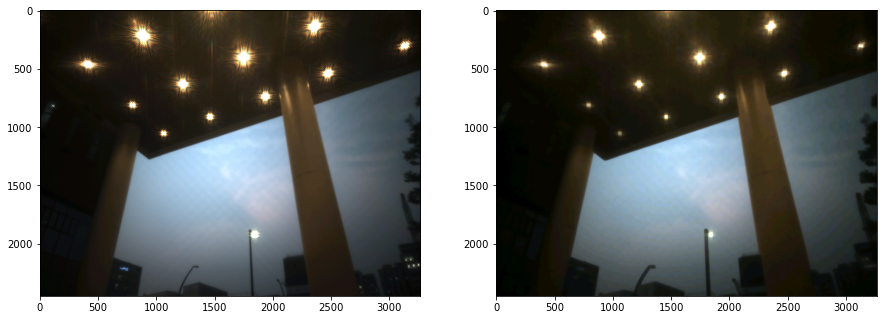

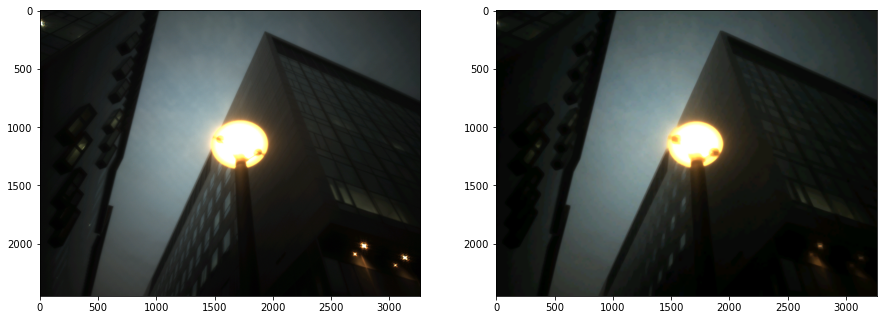

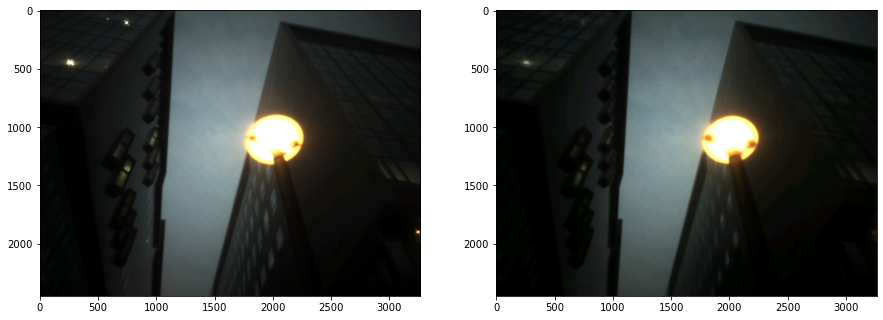

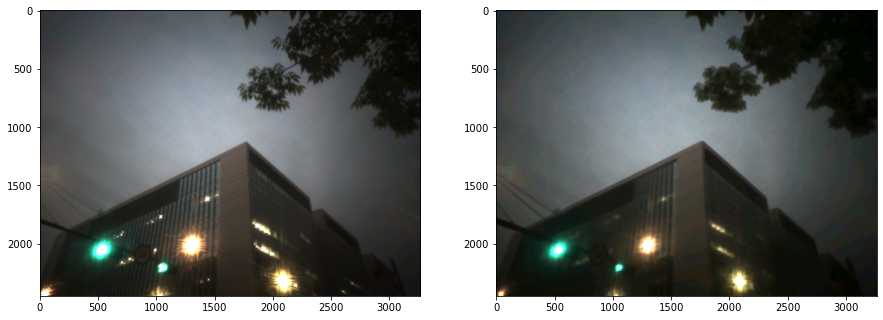

KeyboardInterrupt: 

In [51]:
kernel = np.ones((30,30),np.uint8)
erode_kernel = np.ones((5,5),np.uint8)

for input_path, label_path in zip(train_input_files, train_label_files):
    inp_img = cv2.imread(input_path)
    inp_img = cv2.cvtColor(inp_img, cv2.COLOR_BGR2RGB)
    

    inp_img2 = cv2.morphologyEx(inp_img, cv2.MORPH_OPEN, kernel)
    inp_img3 = cv2.erode(inp_img2, erode_kernel, iterations =4)
#     inp_img3 = cv2.dilate(inp_img3, erode_kernel, iterations =2 )
    
#     inp_img2 = cv2.morphologyEx(inp_img, cv2.MORPH_CLOSE, kernel)
#     inp_img2 = cv2.morphologyEx(inp_img2, cv2.MORPH_GRADIENT, kernel)
#     inp_img2 = cv2.morphologyEx(inp_img, cv2.MORPH_TOPHAT, kernel)
    
    plt.figure(figsize=(15,10))
    plt.subplot(1,2,1)
    plt.imshow(inp_img)
    plt.subplot(1,2,2)
    plt.imshow(inp_img3)
    plt.show()

# 이미지 히스트그램

In [ ]:
for input_path, label_path in zip(train_input_files, train_label_files):
    inp_img = cv2.imread(input_path)
    targ_img = cv2.imread(label_path)
    
    inp_img = cv2.cvtColor(inp_img, cv2.COLOR_BGR2RGB)
    
    
    plt.subplot(1,2,1)
    plt.hist(inp_img.ravel(), 256, [0,256])
    plt.subplot(1,2,2)
    plt.imshow(inp_img)
    plt.show()

In [ ]:
for input_path, label_path in zip(train_input_files, train_label_files):
    inp_img = cv2.imread(input_path)
    
    inp_img = cv2.cvtColor(inp_img, cv2.COLOR_BGR2RGB)
    color = ('b','g','r')
    plt.subplot(1,2,1)
    for i,col in enumerate(color):
        histr = cv2.calcHist([inp_img],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])    
    plt.subplot(1,2,2)
    plt.imshow(inp_img)    
    plt.show()

## 이미지 평활화

In [ ]:
for input_path, label_path in zip(train_input_files, train_label_files):
    inp_img = cv2.imread(input_path)
#     targ_img = cv2.imread(label_path)
    plt.figure(figsize=(15,10))
    inp_img2 =  cv2.cvtColor(inp_img, cv2.COLOR_BGR2YUV)
    inp_img2[:, :, 0] = cv2.equalizeHist(inp_img2[:, :, 0])
    inp_img2 = cv2.cvtColor(inp_img2, cv2.COLOR_YUV2RGB)
#     targ_img = cv2.cvtColor(targ_img, cv2.COLOR_BGR2RGB)
   
    
    color = ('b','g','r')
    plt.subplot(1,2,1)
    plt.imshow(inp_img2)  
    plt.subplot(1,2,2)
    for i,col in enumerate(color):
        histr = cv2.calcHist([inp_img2],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])  
    plt.show()
    print(input_path, label_path, '\n')

평활화를 활용해버리면 전체적으로 히스토그램이 평탄화되면서 범짐이 더 심해지는거같아서 사용하기 힘들듯

#  이미지 이진화

In [ ]:
# max_output_value = 255   # 출력 픽셀 강도의 최대값
# neighborhood_size = 99
# subtract_from_mean = 10

for input_path, label_path in zip(train_input_files, train_label_files):
    inp_img = cv2.imread(input_path, 0 )
#     targ_img = cv2.imread(label_path)
    plt.figure(figsize=(15,10))
    inp_img2 =  cv2.adaptiveThreshold(inp_img,
                                       max_output_value,
                                       cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv2.THRESH_BINARY,
                                       neighborhood_size,
                                       subtract_from_mean)
    inp_img2 = cv2.cvtColor(inp_img2, cv2.COLOR_BGR2RGB)
#     targ_img = cv2.cvtColor(targ_img, cv2.COLOR_BGR2RGB)
   
    plt.subplot(1,2,1)
    plt.imshow(inp_img)
    plt.subplot(1,2,2)
    plt.imshow(inp_img2)
    plt.show()
    print(input_path, label_path, '\n')

이진화 방식을 활용하는게 빛이 번지는 포인트는 더 잘 잡아주는거같음

In [ ]:

for input_path, label_path in zip(train_input_files, train_label_files):
    inp_img = cv2.imread(input_path, 0 )
    plt.figure(figsize=(15,10))
    inp_img2 =  cv2.adaptiveThreshold(inp_img,
                                       max_output_value,
                                       cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv2.THRESH_BINARY,
                                       neighborhood_size,
                                       subtract_from_mean)
    inp_img2 = cv2.cvtColor(inp_img2, cv2.COLOR_BGR2RGB)
   
    plt.subplot(1,2,1)
    plt.imshow(inp_img)
    plt.subplot(1,2,2)
    plt.imshow(inp_img2)
    plt.show()
    print(input_path, label_path, '\n')